# TP 4 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
# Libraries for implemented code 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Libraries for the Sklearn 
from sklearn.linear_model import LogisticRegression

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.`

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]

# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

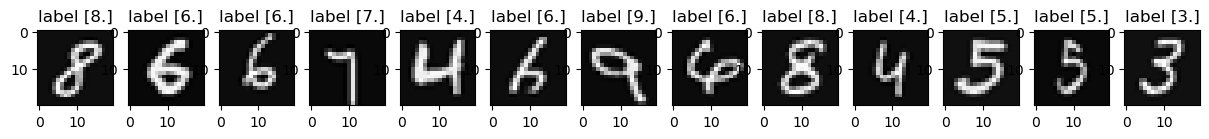

In [5]:
# display de 13 figure avec shape 20 20 

plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous. (OvR)

Nos paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre des caractéristiques + 1 (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.



# Pour l'application de la régularisation sur la régression logistique, cela va donner :

$$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i))] +\frac{\lambda}{2n} \sum_{j=1}^{m} \theta^2_j
$$

# sachant que :


n = nombre d'exemples dans l'ensemble de données



m = nombre de caractéristiques



xi =vecteur de caractéristiques de l'exemple i



yi = classe cible de l'exemple  i



hheta(xi) = résultat de la fonction sigmoïde pour l'exemple i et les paramètres theta



lambda = paramètre de régularisation



theta_j = paramètre 


In [6]:
# fonction sigmoid 
def Sigmoid(z):
    return 1/(1+ np.exp(-z))


# fonction pour calcul du cout 
# appliquer la loi 
def lrCostFunction (X, y, initial_theta, alpha, MaxIter,lambda_):
    n = X.shape[0]
    theta = np.array(initial_theta, copy=True)
    costs = np.zeros(MaxIter)
    
    for i in range(MaxIter):
        z = np.dot(X, theta)
        h = Sigmoid(z)
        cost = -1 * (np.sum(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) / (n)) + (lambda_*(np.sum(np.square(theta[1:]))) / (2*n))
        costs[i] = cost
        gradient = np.dot(X.T, (h - np.reshape(y, h.shape))) / n
        gradient[1:] = gradient[1:] + (lambda_/n) * theta[1:]
        theta = theta - alpha * gradient 
    return theta

In [7]:
def predictOnveVsAll (all_theta, X):
    # compute the probabilities for each class 
    probs = Sigmoid(X.dot(all_theta.T))
    
    # find the class with highest value for each sample  
    y_pred = np.argmax(probs, axis=1)
    
    # reshaping 
    return y_pred.reshape((X.shape[0],1))

In [8]:
# obtain unique classes 
classes= np.unique(y)
print(classes)
print(y)

# the number of classes using the size of classes  
number_classes=classes.shape[0]

# storing the number of classes and the features 
all_theta = np.zeros((number_classes, X.shape[1]));
all_theta.shape

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[0.]
 [0.]
 [0.]
 ...
 [9.]
 [9.]
 [9.]]


(10, 401)

In [19]:
MaxIter= 1000

# we need to find the best lambda 
lambda_= 0.01
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1))

for i in range (number_classes):
     # appel pour chaque classifieur
    theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_);
    all_theta[i,:]=theta.reshape((theta.shape[0],));
    
print(theta.shape)

(401, 1)


In [20]:
# predict using the implemented function of each class vs the rest of the classes 
y_pred = predictOnveVsAll(all_theta, X);

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [21]:
# accuracy of the results 
precision = np.mean(y_pred==y)*100
precision



84.16

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

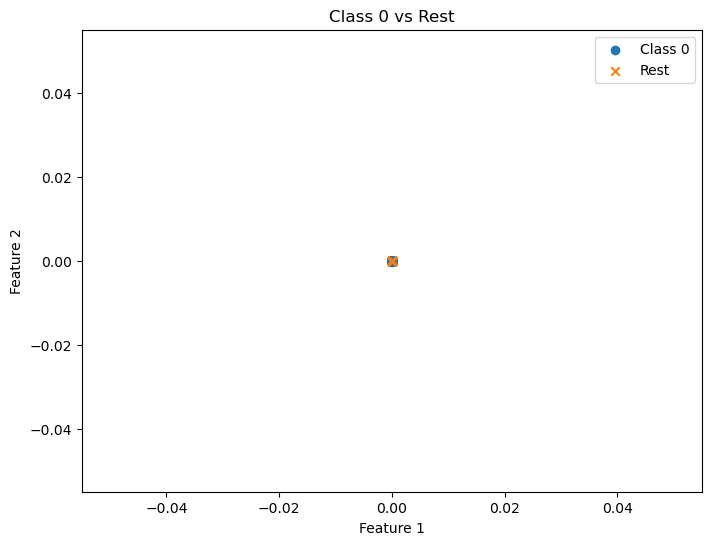

In [12]:
# do this later , how to plot using features ask teacher 
# Extract features (pixels) and labels (classes) from data
X_pixels = data[:, :-1]  
y_class = data[:, -1]    

# Filter data for class 0 and the rest
X_class_0 = X_pixels[y_class == 0]
X_rest = X_pixels[y_class != 0]

# Plot class 0 versus the rest
plt.figure(figsize=(8, 6))
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label="Class 0", marker='o')
plt.scatter(X_rest[:, 0], X_rest[:, 1], label="Rest", marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Class 0 vs Rest')
plt.show()



# Affichage 
Graphe representant les acceptations selon les caracteristiques

# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [13]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape

(25, 401)

In [14]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [15]:
# adding the column of ones and stack it with data 
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))

input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [16]:
# we are gonna predict the  classes using the neural network method (with one hidden layer)
# after retreiving the weights W1 , W2  the input layer nodes and the hidden layer nodes 
# after getting the input data 
# we use these as parameters to predict 

def predict (W1, W2, X):
    
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---! // calculer l'activation
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    
    # calcul des activation 
    h1_output = Sigmoid(np.dot(X, W1.T))

    # stacking the intercept and h1_outputs (input layer computing ) and save it in h2_input 
    intercept = np.ones((X.shape[0],1))

    h2_input = np.column_stack((intercept, h1_output))

    # compute the h2_output using the h2_input and the data from the hidden layer 
    h2_output = Sigmoid(np.dot(h2_input, W2.T))

    # predict the classes using the h2_output 
    y_pred = np.argmax(h2_output, axis=1)[..., np.newaxis]
    
    # some adjustments
    y_pred = y_pred + 1
    y_pred[y_pred==10] = 0

    return y_pred

In [17]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(W1, W2, X)
precision = np.mean(y==y_pred)*100
precision

97.52

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [18]:
# Initialisation du modèle de régression logistique  (regularisation utilise L2)
# avec un nombre d'iterations 10000
model = LogisticRegression(penalty="l2", max_iter=10000)

# Train the model using the fit function 
model.fit(X[:, 1:], y.squeeze())

# get the probas of predictions of our model 
y_prob = model.predict_proba(X[:, 1:])

# Sélection de la classe prédite pour chaque exemple en choisissant l'indice 
# de la classe avec la probabilité la plus élevée
y_pred = np.argmax(y_prob, axis=1)[..., np.newaxis]

# Calcul de la précision du modèle en comparant les classes prédites 
# ce qui va nous permettre de voir la difference entre le model implemente et le model predefini 

accuracy = np.mean(y_pred==y)*100
accuracy

96.24000000000001